## EDA LAB

For this lab, I chose to explore whether a person's household (currently or when growing up) is correlated with their views of trust and safety in the world. I included some demographic variables, just to see what impact those might have had on the variables I was looking at, those being year, age, sex, and race. For household I chose to look at happiness of marriage, marital status, number of children, strength of religious affiliation, number of persons in household, and number of family generations in household. To test trust, I found two variables of trust and fairness. Without much prior research, it is hard to say what I would expect to see from these results, but I think it is interesting to see what factors in someone's household may make them more trusting or believe there is less fairness in the world. 

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('./GSS.xlsx', engine="openpyxl")
df.head(5)

,year,id_,marital,childs,age,sex,race,hompop,reliten,hapmar,fair,trust,famgen
0,1972,1,Never married,0,23,FEMALE,White,1,.i: Inapplicable,.i: Inapplicable,Would try to be fair,Depends,.i: Inapplicable
1,1972,2,Married,5,70,MALE,White,2,.i: Inapplicable,.i: Inapplicable,Would try to be fair,Most people can be trusted,.i: Inapplicable
2,1972,3,Married,4,48,FEMALE,White,4,.i: Inapplicable,.i: Inapplicable,Would take advantage of you,Can't be too careful,.i: Inapplicable
3,1972,4,Married,0,27,FEMALE,White,2,.i: Inapplicable,.i: Inapplicable,Would try to be fair,Can't be too careful,.i: Inapplicable
4,1972,5,Married,2,61,FEMALE,White,2,.i: Inapplicable,.i: Inapplicable,Would try to be fair,Can't be too careful,.i: Inapplicable


/tmp/ipykernel_5881/3620431667.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fair'].replace(['Would try to be fair', 'Would take advantage of you', 'Depends',
/tmp/ipykernel_5881/3620431667.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[co

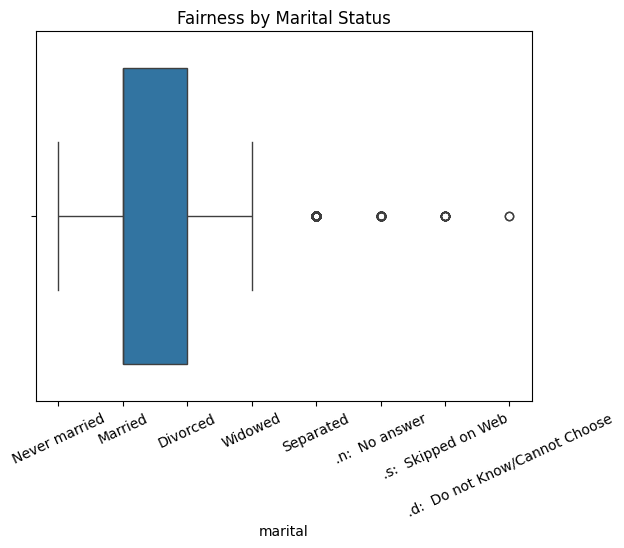

In [28]:
#Cleaning up the fair variable
#print(df['fair'].unique())
#Add numbers for each value of fairness so you can plot take averages, discard extra values 
df['fair'].replace(['Would try to be fair', 'Would take advantage of you', 'Depends',
 '.d:  Do not Know/Cannot Choose', '.n:  No answer', '.i:  Inapplicable',
 '.y:  Not available in this year'], [3, 1, 2, np.nan, np.nan, np.nan, np.nan], inplace=True)

#print(df['trust'].unique()) 
df['trust'].replace(['Depends', 'Most people can be trusted', "Can't be too careful",
 '.d:  Do not Know/Cannot Choose', '.n:  No answer', '.i:  Inapplicable',
 '.y:  Not available in this year'], [2, 3, 1, np.nan, np.nan, np.nan, np.nan], inplace=True)

#convert home population to numeric 
df['hompop'].replace([".n:  No answer"],[np.nan])
df['hompop'] = pd.to_numeric(df['hompop'])

Trust = df['trust'].dropna()
Fair = df['fair'].dropna()

sns.boxplot(df, y=Trust, x="marital")
plt.title("Fairness by Marital Status")
plt.xticks(rotation = 25)
plt.show()

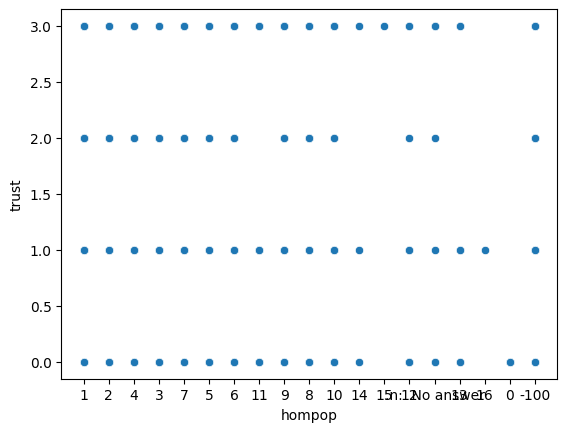

In [21]:
sns.scatterplot(df, x="hompop", y=Trust)
plt.show()